In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
df = pd.read_csv('C:/Users/aaron/PycharmProjects/DSPRO1-power-prediction/data/formatted_source_data.csv')

# Data Inspection and Preprocessing

In [89]:
df.head()   # To inspect the first few rows

,Unnamed: 0,Date,Value_NE5,Value_NE7,Hr [%Hr],RainDur [min],StrGlo [W/m2],T [°C],WD [°],WVs [m/s],WVv [m/s],p [hPa],Vacation,Holiday_Type
0,0,2014-12-31 23:00:00+00:00,65674.7507,135628.059644,89.25,0.0,0.02,-2.09,20.41,1.40,1.40,982.80,0.0,0.0
1,1,2015-01-01 00:00:00+00:00,88747.5885,172742.750946,90.47,0.0,0.01,-2.48,353.85,0.61,0.60,982.64,1.0,1.0
2,3,2015-01-01 01:00:00+00:00,86864.5321,173541.200194,89.45,0.0,0.02,-2.46,21.48,1.31,1.31,983.00,1.0,1.0
3,5,2015-01-01 02:00:00+00:00,84158.7339,162802.863240,89.20,0.0,0.02,-2.63,12.22,1.70,1.66,982.93,1.0,1.0
4,7,2015-01-01 03:00:00+00:00,81133.3041,154123.513780,89.56,0.0,0.02,-2.77,8.30,1.23,1.21,983.03,1.0,1.0


In [90]:
df.tail()   # To inspect the last few rows

,Unnamed: 0,Date,Value_NE5,Value_NE7,Hr [%Hr],RainDur [min],StrGlo [W/m2],T [°C],WD [°],WVs [m/s],WVv [m/s],p [hPa],Vacation,Holiday_Type
85507,87432,2024-10-02 18:00:00+00:00,97709.76414,239533.655446,75.44,0.0,0.02,12.40,91.94,0.43,0.19,960.38,0.0,0.0
85508,87433,2024-10-02 19:00:00+00:00,92747.39780,216297.212208,78.77,0.0,0.03,11.79,55.61,0.71,0.67,960.46,0.0,0.0
85509,87434,2024-10-02 20:00:00+00:00,90526.20874,189594.801230,81.53,0.0,0.02,11.25,46.56,1.23,1.20,960.38,0.0,0.0
85510,87435,2024-10-02 21:00:00+00:00,88544.08770,162516.811849,86.30,0.0,0.02,10.70,35.60,1.56,1.50,960.38,0.0,0.0
85511,87436,2024-10-02 22:00:00+00:00,22284.21082,37379.934803,88.92,0.0,0.02,10.42,6.21,1.71,1.62,960.42,0.0,0.0


In [91]:
df.info()   # To check data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85512 entries, 0 to 85511
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     85512 non-null  int64  
 1   Date           85512 non-null  object 
 2   Value_NE5      85512 non-null  float64
 3   Value_NE7      85512 non-null  float64
 4   Hr [%Hr]       85080 non-null  float64
 5   RainDur [min]  85362 non-null  float64
 6   StrGlo [W/m2]  85362 non-null  float64
 7   T [°C]         85104 non-null  float64
 8   WD [°]         85373 non-null  float64
 9   WVs [m/s]      79128 non-null  float64
 10  WVv [m/s]      85373 non-null  float64
 11  p [hPa]        85262 non-null  float64
 12  Vacation       85512 non-null  float64
 13  Holiday_Type   85512 non-null  float64
dtypes: float64(12), int64(1), object(1)
memory usage: 9.1+ MB


In [92]:
df.describe()   # To get summary statistics

,Unnamed: 0,Value_NE5,Value_NE7,Hr [%Hr],RainDur [min],StrGlo [W/m2],T [°C],WD [°],WVs [m/s],WVv [m/s],p [hPa],Vacation,Holiday_Type
count,85512.000000,85512.000000,85512.000000,85080.000000,85362.000000,85362.000000,85104.000000,85373.000000,79128.000000,85373.000000,85262.000000,85512.000000,85512.000000
mean,44589.074118,102589.258471,205940.762034,68.275566,5.762793,143.644799,12.495320,167.894148,1.812485,1.601786,966.756990,0.293994,0.052203
std,24836.176111,21204.226945,49806.543025,16.887314,15.612697,231.185343,7.996736,108.506906,1.074747,1.133585,7.748628,0.455592,0.277460
min,0.000000,22284.210820,0.000000,14.110000,0.000000,0.010000,-10.580000,0.000000,0.000000,0.000000,927.880000,0.000000,0.000000
25%,23302.750000,84384.055575,159575.386867,56.710000,0.000000,0.020000,6.150000,46.230000,1.040000,0.760000,962.790000,0.000000,0.000000
50%,44680.500000,96308.958750,207008.621774,71.610000,0.000000,4.860000,12.090000,182.710000,1.600000,1.410000,967.120000,0.000000,0.000000
75%,66058.250000,121935.616888,246476.689410,82.020000,0.000000,203.527500,18.530000,254.410000,2.320000,2.180000,971.310000,1.000000,0.000000
max,87436.000000,168420.769700,330601.031836,102.250000,60.000000,1048.500000,35.890000,360.000000,10.720000,10.560000,991.680000,1.000000,2.000000


In [93]:
df['Date'] = pd.to_datetime(df["Date"])
df.set_index('Date', inplace=True)  # Set 'Date' as the index for time series analysis

In [94]:
df.isna().sum() # Check for missing values
df.ffill(inplace=True) # Forward-filling missing data

# Visualizing the Data

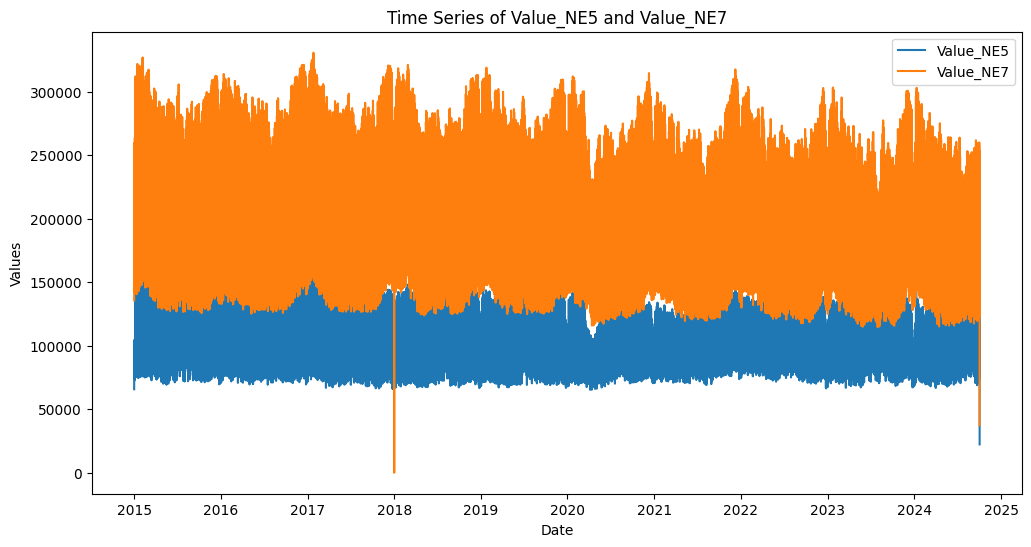

In [95]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y='Value_NE5', data=df, label='Value_NE5')
sns.lineplot(x=df.index, y='Value_NE7', data=df, label='Value_NE7')
plt.title('Time Series of Value_NE5 and Value_NE7')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

There is an anomly at around 2018 and at the end of the dataset which we will explore further.

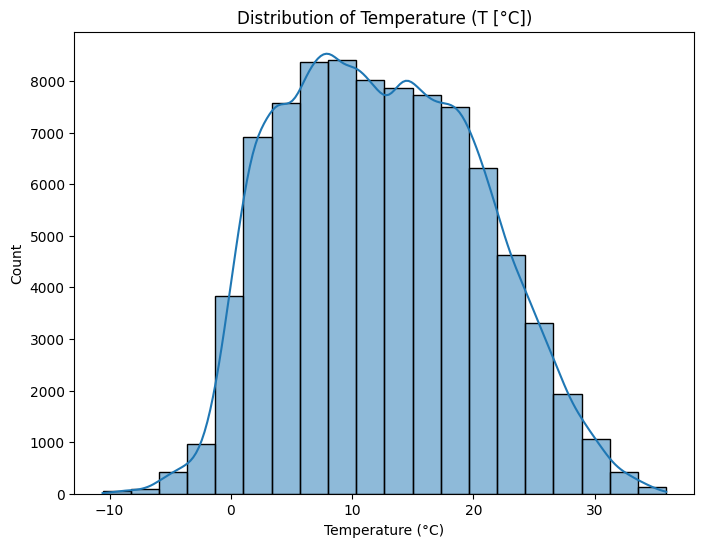

In [96]:
plt.figure(figsize=(8, 6))
sns.histplot(df['T [°C]'], bins=20, kde=True)
plt.title('Distribution of Temperature (T [°C])')
plt.xlabel('Temperature (°C)')
plt.show()


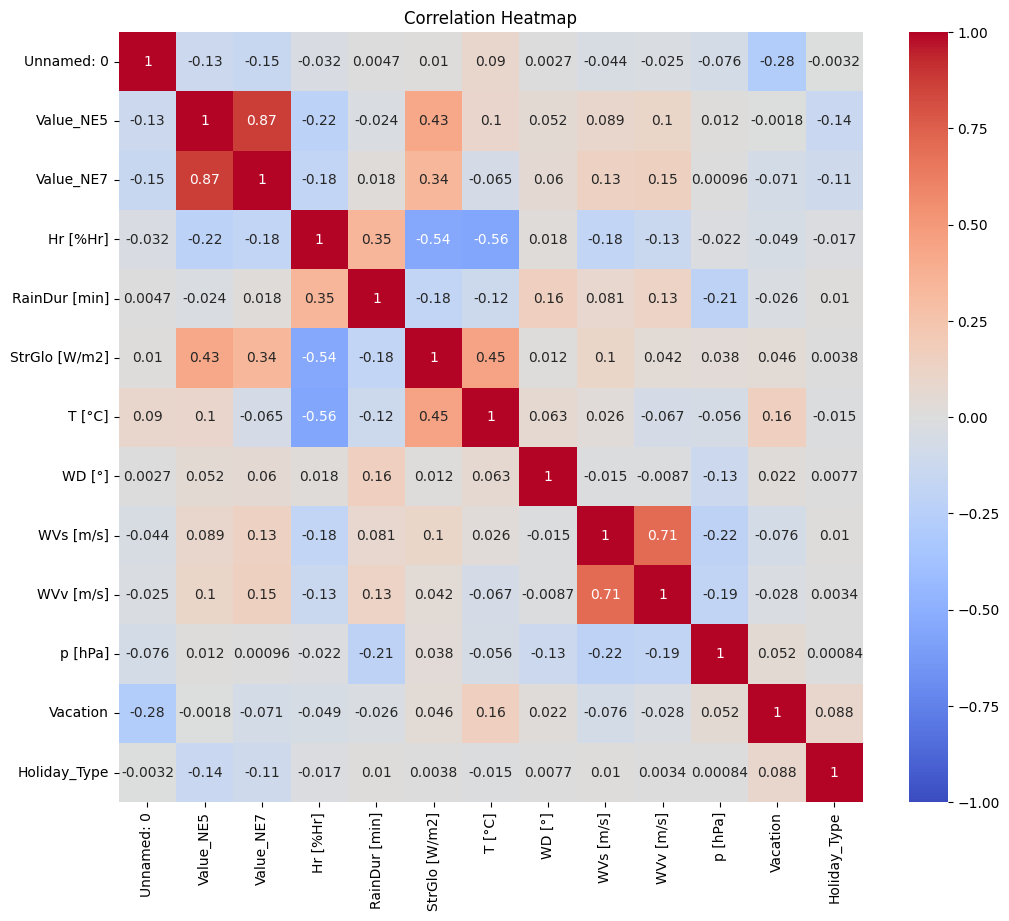

In [97]:
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

### Winds Speed and Direction

**Radial Axis (Circles):**

Values (2, 4, 6, 8, etc.) indicate the magnitude of wind speed in meters per second (m/s)


**Angular Axis:**

0° corresponds to wind coming from Nort

90° corresponds to wind coming from East

180° corresponds to wind coming from South

270° corresponds to wind coming from West

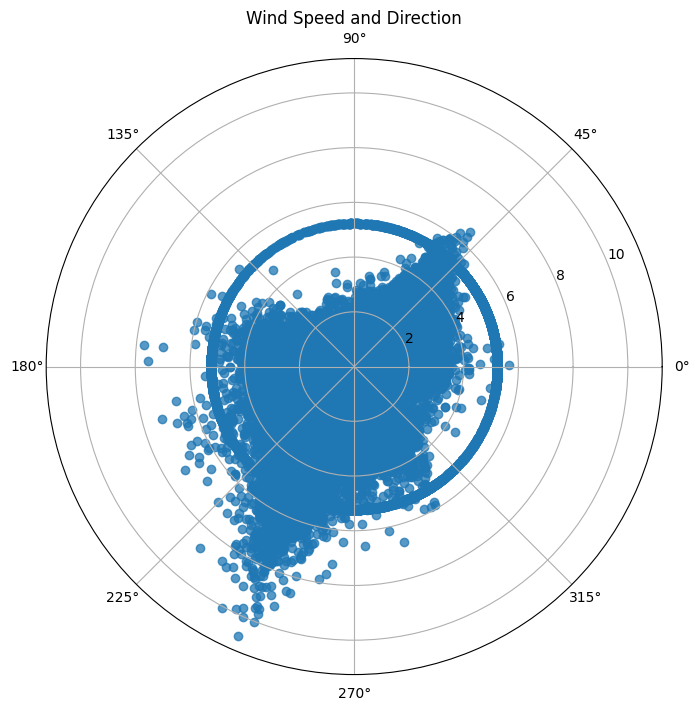

In [98]:
# Convert degrees to radians for plotting
wind_direction = np.radians(df['WD [°]'])
wind_speed = df['WVs [m/s]']

plt.figure(figsize=(8, 8))
plt.subplot(projection='polar')
plt.scatter(wind_direction, wind_speed, alpha=0.75)
plt.title('Wind Speed and Direction')
plt.show()

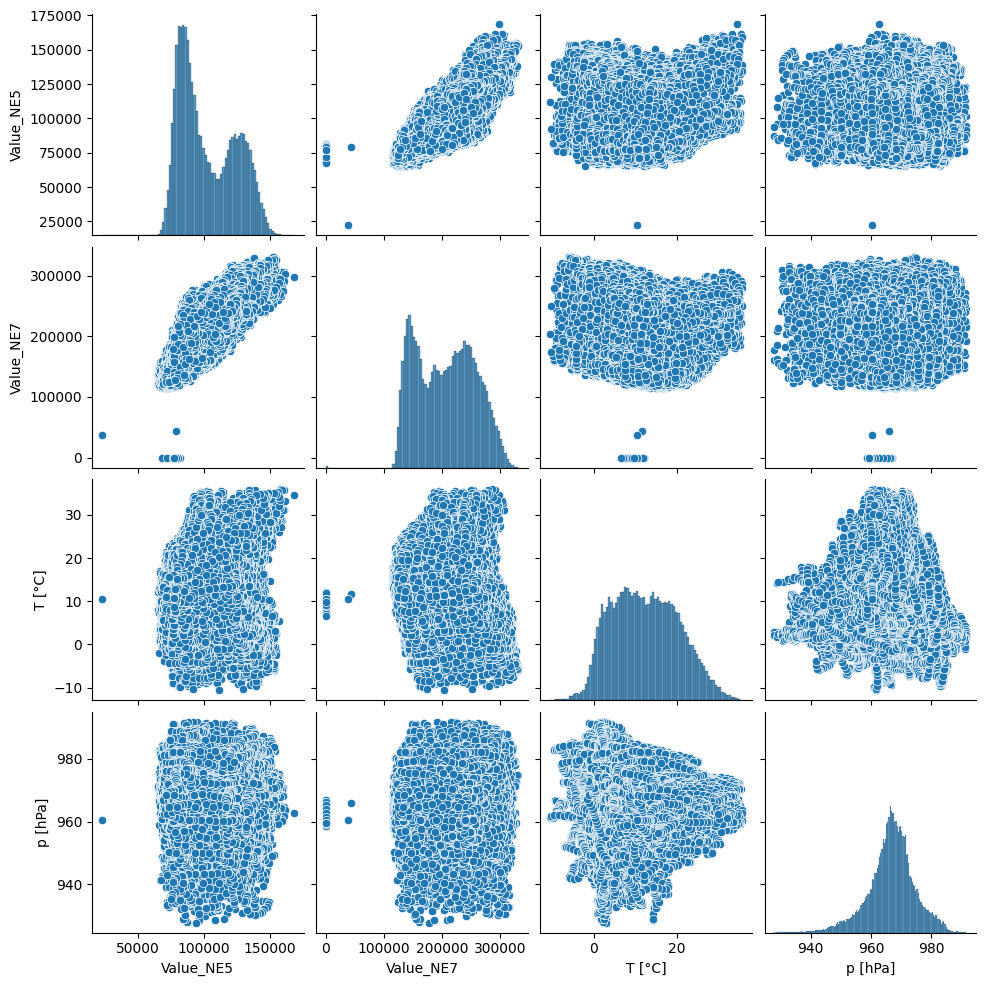

In [99]:
sns.pairplot(df[['Value_NE5', 'Value_NE7', 'T [°C]', 'p [hPa]']])
plt.show()

### Anomaly exploration

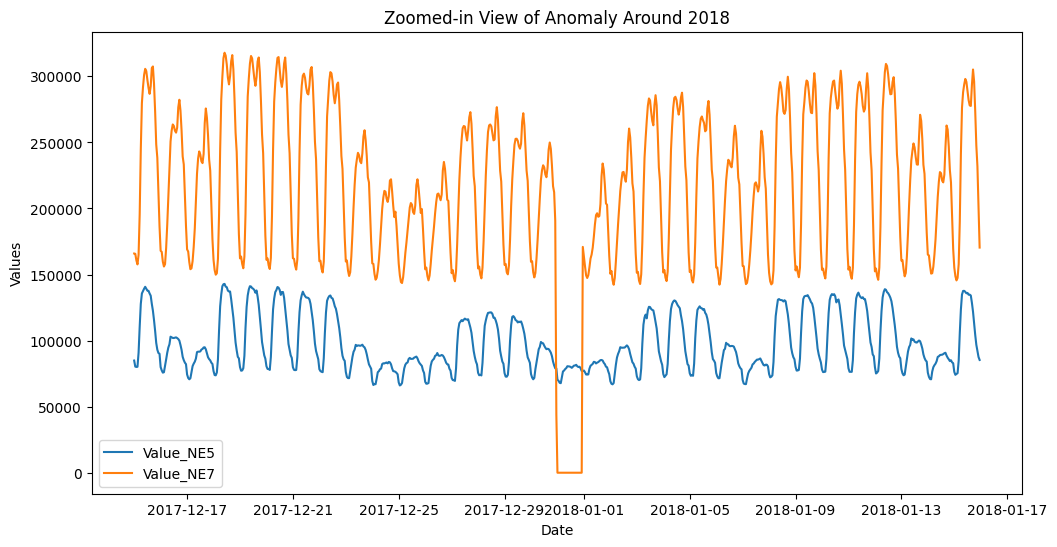

In [100]:
# Filter the dataset to focus on the period around 2018
anomaly_period = df.loc['2017-12-15':'2018-01-15']

plt.figure(figsize=(12, 6))
sns.lineplot(x=anomaly_period.index, y='Value_NE5', data=anomaly_period, label='Value_NE5')
sns.lineplot(x=anomaly_period.index, y='Value_NE7', data=anomaly_period, label='Value_NE7')
plt.title('Zoomed-in View of Anomaly Around 2018')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

In [101]:
# Check for missing data
anomaly_period.isna().sum()

Unnamed: 0       0
Value_NE5        0
Value_NE7        0
Hr [%Hr]         0
RainDur [min]    0
StrGlo [W/m2]    0
T [°C]           0
WD [°]           0
WVs [m/s]        0
WVv [m/s]        0
p [hPa]          0
Vacation         0
Holiday_Type     0
dtype: int64

In [102]:
# Describe the anomaly period data
print(anomaly_period.describe())

         Unnamed: 0      Value_NE5      Value_NE7    Hr [%Hr]  RainDur [min]  \
count    768.000000     768.000000     768.000000  768.000000     768.000000   
mean   28205.500000   97585.050265  215029.168897   79.457331       7.084036   
std      221.846794   21279.737499   63807.031545   10.351905      16.982801   
min    27822.000000   66027.482100       0.000000   40.920000       0.000000   
25%    28013.750000   80598.003400  165537.582171   73.290000       0.000000   
50%    28205.500000   90532.956075  220991.543914   81.760000       0.000000   
75%    28397.250000  115648.455188  266095.285816   86.405000       0.000000   
max    28589.000000  142912.516500  317878.235814   98.800000      60.000000   

       StrGlo [W/m2]      T [°C]      WD [°]   WVs [m/s]   WVv [m/s]  \
count     768.000000  768.000000  768.000000  768.000000  768.000000   
mean       31.840482    4.523385  179.046250    3.440924    2.052526   
std        65.875735    2.941605   93.128563    1.951635    1.5